<a href="https://colab.research.google.com/github/somilasthana/deeplearningtutorial/blob/master/Concept_Overfitting_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
Theory 

Usually the accuracy of any model on the validation data would peak after training for a number of epochs, and would then start decreasing.
This is because the model begans to overfit to the training data.

The opposite of overfitting is underfitting. Underfitting occurs when there is still room for improvement on the test data. 
This can happen for a number of reasons: 
- If the model is not powerful enough, is over-regularized, 
- or has simply not been trained long enough. This means the model has not learned the relevant patterns in the training data.

To prevent overfitting, the best solution is to use more training data. 
A model trained on more data will naturally generalize better. 
When that is no longer possible, the next best solution is to use techniques like regularization.

"""

In [0]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
#import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
#!pip install numpy==1.16.1
import numpy as np

In [0]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [0]:
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

In [0]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data  = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [48]:
train_data.shape, test_data.shape

((25000, 10000), (25000, 10000))

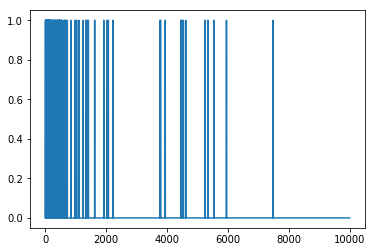

In [33]:
plt.plot(train_data[0])

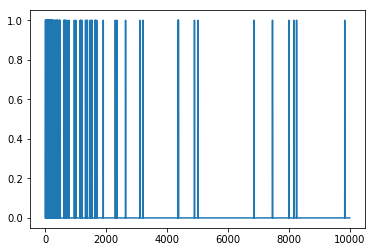

In [34]:
plt.plot(train_data[1])

In [0]:
"""
Theory:

The simplest way to prevent overfitting is to reduce the size of the model, i.e. the number of learnable parameters in the model

In deep learning, the number of learnable parameters in a model is often referred to as the model's "capacity".

Intuitively, a model with more parameters will have more "memorization capacity" and therefore will be able to easily learn a 
perfect dictionary-like mapping between training samples and their targets, which wont generalize well.

On the other hand, if the network has limited memorization resources, it will not be able to learn the mapping as easily.

To find an appropriate model size, it's best to start with relatively few layers and parameters, then begin increasing the size 
of the layers or adding new layers until you see diminishing returns on the validation loss.
"""

In [10]:
baseline_model = keras.Sequential([
    
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS, )),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1,  activation=tf.nn.sigmoid)
    
])


baseline_model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy']
)

baseline_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [11]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=0)

Instructions for updating:
Use tf.cast instead.


In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Binary Cross Entropy []')
  plt.plot(hist['epoch'], hist['binary_crossentropy'],
           label='Train Entropy')
  plt.plot(hist['epoch'], hist['val_binary_crossentropy'],
           label = 'Val Entropy')
  plt.ylim([0,2])
  plt.grid()
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Loss')
  plt.ylim([0,5])
  plt.legend()
  plt.grid()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'],
           label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Accuracy')
  plt.ylim([0,2])
  plt.legend()
  plt.grid()
  plt.show()

In [0]:
#plot_history(baseline_history)

Simple Model

In [49]:
smaller_model = keras.Sequential([
    
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
    
])


smaller_model.compile(optimizer = 'adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy']
                     )

smaller_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [0]:
smaller_history = smaller_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                    verbose=0
                                    )

In [0]:
#plot_history(smaller_history)

Bigger Model

In [58]:
bigger_model = keras.models.Sequential([
    
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS, )),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
    
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy']
                    )

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [0]:
bigger_history = bigger_model.fit(train_data, 
                                  train_labels,
                                  epochs=20,
                                  validation_data=(test_data, test_labels),
                                  verbose=0
                                 )

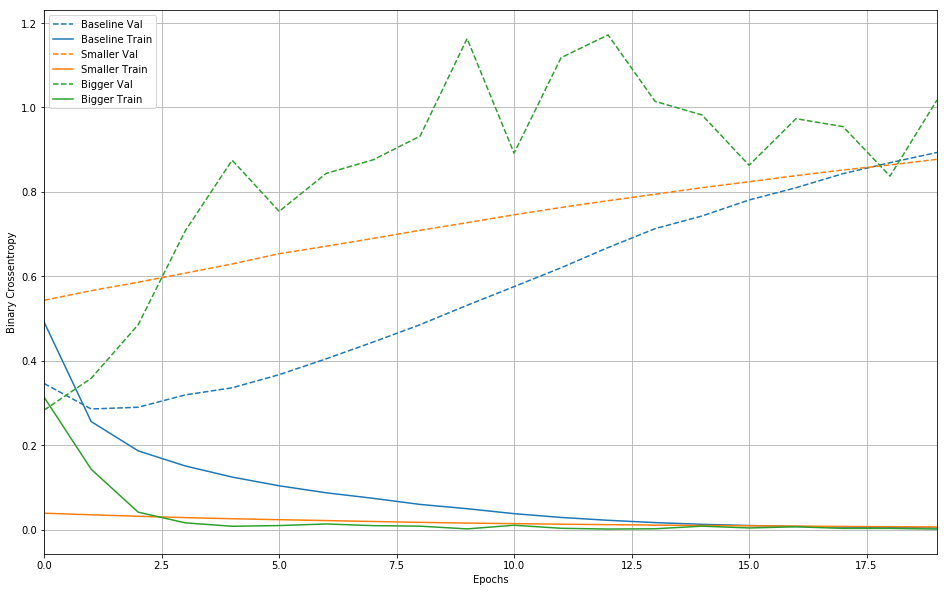

In [62]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()
  plt.grid()
  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

Regularization: Common way to mitigate overfitting is to put constraint on the complexity of the network by forcing its weight to take smaller values, which makes distribution of weights more regular. This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights.

L2 Regularization

In [63]:
l2_model = keras.models.Sequential([
    
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
    
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy']
                )
l2_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_24 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
l2_model_history = l2_model.fit(train_data, train_labels, 
                                epochs=20, 
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=0
                               )

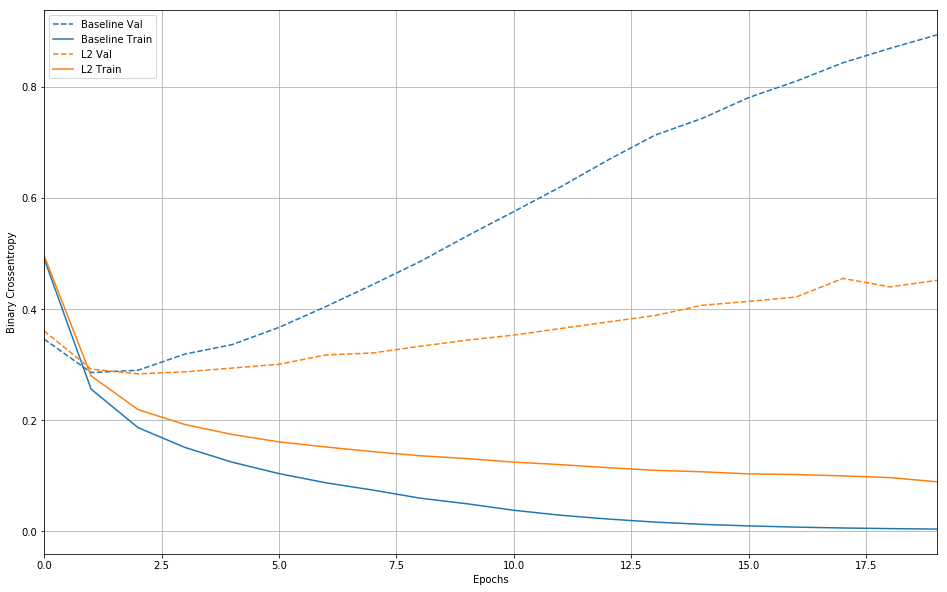

In [65]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

Dropout: Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training. 

In [67]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS, )),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
]
)

dpt_model.summary()

dpt_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels, epochs=20, batch_size=512, 
                                  validation_data=(test_data, test_labels), verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


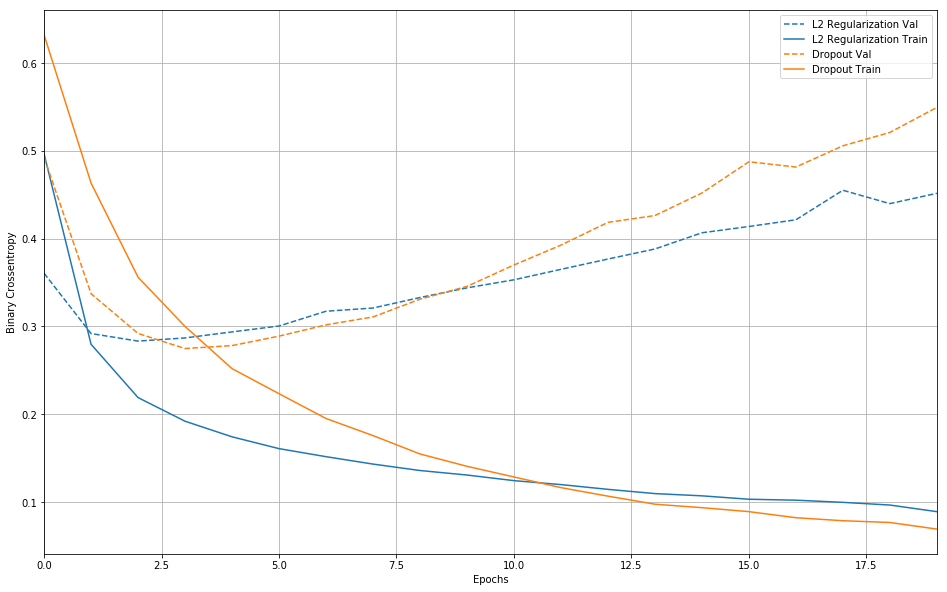

In [69]:
plot_history([('l2 regularization', l2_model_history),
              ('dropout', dpt_model_history)])

In [0]:
# This shows that both L2 regularization and Dropout behave almost same. 
# May be there is a hidden connection with them.
# On one hand, binary cross entropy for L2 dips at an epoch sooner than Dropout. However, Dropout provides a better model.